In [1]:
from sklearn.decomposition import PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

import warnings
warnings.filterwarnings('ignore')

In [3]:
BX = sio.loadmat("data/X/balloons_ms")
BX

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 14 18:21:15 2020',
 '__version__': '1.0',
 '__globals__': [],
 'msi': array([[[0.01568627, 0.01176471, 0.00784314, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.0627451 , 0.07843137, 0.09019608, ..., 0.01960784,
          0.01960784, 0.01568627],
         [0.0627451 , 0.0745098 , 0.09411765, ..., 0.01960784,
          0.01960784, 0.01960784],
         [0.0627451 , 0.0745098 , 0.09019608, ..., 0.01960784,
          0.01960784, 0.01568627]],
 
        [[0.01568627, 0.01176471, 0.00784314, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.02352941, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.   

In [4]:
ballon_arr = BX['msi']

In [5]:
ballon_arr.shape

(512, 512, 31)

In [6]:
512*512

262144

In [7]:
reshaped_image = ballon_arr.reshape(512*512, 31)

In [8]:
norm = (reshaped_image - np.mean(reshaped_image, axis=0)) / np.std(reshaped_image, axis=0)

## PCA - HS2RGB

In [9]:
pca = PCA(n_components=3)
pca.fit(norm)

PCA(n_components=3)

In [11]:
rgb = pca.components_

In [12]:
rgb

array([[ 0.17736671,  0.16562903,  0.16707284,  0.16248377,  0.16060933,
         0.15814267,  0.15936263,  0.16047084,  0.16442154,  0.17464097,
         0.18476391,  0.18888906,  0.18823057,  0.18787929,  0.18787078,
         0.18697202,  0.18464846,  0.18265533,  0.18479017,  0.18707507,
         0.18605419,  0.18444694,  0.18362596,  0.18432978,  0.18580625,
         0.1869349 ,  0.18740956,  0.18743552,  0.18686734,  0.18602856,
         0.18526618],
       [-0.15845387, -0.25108033, -0.24610001, -0.26755114, -0.277818  ,
        -0.28957715, -0.28613468, -0.28116021, -0.26301353, -0.2098226 ,
        -0.12924676, -0.03321762,  0.02028264,  0.05589771,  0.08216069,
         0.10722535,  0.1315675 ,  0.14815413,  0.14955889,  0.14756889,
         0.15188204,  0.15658021,  0.15731157,  0.15037786,  0.14111205,
         0.13065096,  0.12442634,  0.12672688,  0.13246054,  0.13951507,
         0.14513015],
       [ 0.1857684 ,  0.1350857 ,  0.15426601,  0.13501752,  0.10827835,
       

In [13]:
rgb.shape

(3, 31)

In [14]:
norm.shape

(262144, 31)

In [15]:
rgb_image = np.dot(norm, rgb.T)

In [16]:
rgb_image = rgb_image.reshape(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


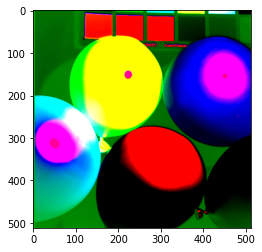

In [17]:
plt.imshow(rgb_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


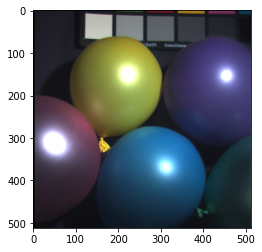

In [18]:
BY = sio.loadmat("data/Y/balloons_ms")
original = BY['RGB']
plt.imshow(original)

## Evaluation Metrics- MSE and SSIM

In [19]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [20]:
mse_met = mean_squared_error(rgb_image, original)
mse_met

9.603877666357434

In [21]:
ssim_met = ssim(rgb_image, original, data_range=rgb_image.max()-rgb_image.min(), multichannel=True)

In [22]:
ssim_met

0.18519666548950406

In [23]:
from skimage.filters import threshold_otsu
from sklearn.impute import SimpleImputer

## Auto thresholding

In [24]:
threshold = threshold_otsu(reshaped_image)

In [25]:
type(threshold)

numpy.float64

In [26]:
threshold

0.22513020833333333

In [27]:
binary_image = reshaped_image > threshold
binary_image.shape

(262144, 31)

## Implement Auto thresholding on ballon arr

In [28]:
binary_image = np.zeros_like(reshaped_image, dtype=bool)
for i in range(30):
    threshold = threshold_otsu(reshaped_image[:, i])
    binary_image[:, i] = reshaped_image[:, i] > threshold

In [29]:
binary_image

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Group similar matrix

In [30]:
sim = np.full_like(reshaped_image,0.8)
for i in range(30):
    sim[:, i] = np.sum(reshaped_image[:, i][binary_image[:, i]])

In [38]:
sim

array([[4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01],
       [4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01],
       [4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01],
       ...,
       [4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01],
       [4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01],
       [4.64546667e+03, 1.95581176e+04, 2.14119922e+04, ...,
        2.17010471e+04, 2.20280275e+04, 8.00000000e-01]])

In [31]:
sim = np.nan_to_num(sim, nan=0.0)

In [32]:
norm = (sim - np.mean(sim, axis=0)) / np.std(sim, axis=0)

In [39]:
norm

array([[-1., -1., -1., ..., -1.,  1.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.],
       ...,
       [-1., -1., -1., ..., -1.,  1.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.],
       [-1., -1., -1., ..., -1.,  1.,  1.]])

In [40]:
norm.min(),norm.max()

(-1.0, 1.0)

In [33]:
norm.shape

(262144, 31)

In [34]:
pca = PCA(n_components=3)
pca.fit(norm)

PCA(n_components=3)

In [35]:
rgb = pca.components_
rgb_image = np.dot(norm, rgb.T)
rgb_image = rgb_image.reshape(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


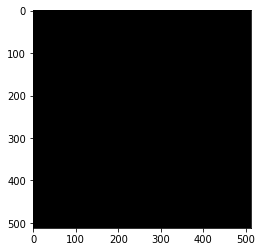

In [36]:
plt.imshow(rgb_image)

In [37]:
rgb_image

array([[[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       ...,

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]],

       [[-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.],
        ...,
        [-1., -1., -1.],
        [-1., -1., -1.],
        [-1., -1., -1.]]